# Análisis Exploratorio

## DataSets
### Who eats the food we grow?

Worldwide food\feed production and distribution, 1961-2013

https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production

### World Population Dataset
This Dataset contains Population data of every Country/Territory in the world

https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

In [1]:
# Import libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import geopandas as gpd
from ipywidgets import interact, interactive,fixed,interact_manual
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycountry_convert as pc
import ipympl


In [2]:
#read CSV, select encoding ISO-8859-1 to ensure compatibility
df_FAO = pd.read_csv('./datasets/FAO.csv',encoding = "ISO-8859-1")

# Visualización preliminar

In [3]:
df_FAO.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


# Descripción de las columnas y del dataframe

In [4]:
df_FAO = df_FAO.astype({'Y2012':float,'Y2013':float})
df_FAO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [5]:
df_FAO.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [6]:
len(set(df_FAO.Item.to_list()))

115

In [7]:
set(df_FAO.Item.to_list())

{'Alcoholic Beverages',
 'Animal fats',
 'Apples and products',
 'Aquatic Animals, Others',
 'Aquatic Plants',
 'Aquatic Products, Other',
 'Bananas',
 'Barley and products',
 'Beans',
 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Bovine Meat',
 'Butter, Ghee',
 'Cassava and products',
 'Cephalopods',
 'Cereals - Excluding Beer',
 'Cereals, Other',
 'Citrus, Other',
 'Cloves',
 'Cocoa Beans and products',
 'Coconut Oil',
 'Coconuts - Incl Copra',
 'Coffee and products',
 'Cottonseed',
 'Cottonseed Oil',
 'Cream',
 'Crustaceans',
 'Dates',
 'Demersal Fish',
 'Eggs',
 'Fats, Animals, Raw',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Fish, Seafood',
 'Freshwater Fish',
 'Fruits - Excluding Wine',
 'Fruits, Other',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Groundnut Oil',
 'Groundnuts (Shelled Eq)',
 'Honey',
 'Infant food',
 'Lemons, Limes and products',
 'Maize Germ Oil',
 'Maize and products',
 'Marine Fish, Other',
 'Meat',
 'Meat, Aquatic Mammals',


In [8]:
len(set(df_FAO.Area.to_list()))

174

In [9]:
set(df_FAO.Area.to_list())

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'China, mainland',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

# Corregir nombres de columnas

In [10]:
# A lowercase y sin espacios
df_FAO.columns = df_FAO.columns.str.lower()
df_FAO.columns = df_FAO.columns.str.replace(' ','_')
# Quitar 'Y' del nombre de columna
df_FAO.rename(columns={x: x[1:] for x in df_FAO.columns if 'y' in x}, inplace=True)
df_FAO

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426.0,451.0
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15.0,15.0
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40.0,40.0
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sanitización:
- Analizar valores nulos y decidir si quitarlos
- Chequear en el website de FAO si hay categorias agrupadoras
- Analizar valores negativos
- Quitar filas que no suman datos
- Quitar filas duplicadas

In [11]:
df_FAO.isna().sum()[df_FAO.isna().sum() > 0]

1961    3539
1962    3539
1963    3539
1964    3539
1965    3539
1966    3539
1967    3539
1968    3539
1969    3539
1970    3539
1971    3539
1972    3539
1973    3539
1974    3539
1975    3539
1976    3539
1977    3539
1978    3539
1979    3539
1980    3539
1981    3539
1982    3539
1983    3539
1984    3539
1985    3539
1986    3539
1987    3539
1988    3539
1989    3539
1990    3415
1991    3415
1992     987
1993     612
1994     612
1995     612
1996     612
1997     612
1998     612
1999     612
2000     349
2001     349
2002     349
2003     349
2004     349
2005     349
2006     104
2007     104
2008     104
2009     104
2010     104
2011     104
dtype: int64

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(df_FAO.isna().sum()['1961':'2013'],marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Number of NA')
plt.xticks(rotation = 90)
ax.grid(True)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

### Comentarios
- Observamos que entre 1961 y 1991 hay gran cantidad de registros con valores nulos que corresponden a países que no existían antes de 1991 (caida de la URRS: 26/12/1991) o que no se tiene registros en esa época. Ejemplo: Etiopia, Luxemburgo y Belgica.
- Como los NaN no afectan a los cálculos, no hay necesidad de removerlos.


In [13]:
df_FAO[df_FAO['1961'].isnull()].groupby("area").mean(numeric_only=True)

,area_code,item_code,element_code,latitude,longitude,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
area,,,,,,,,,,,,,,,,,,,,,
Armenia,1.0,2693.225564,5241.736842,40.07,45.04,NaN,NaN,NaN,NaN,NaN,...,41.466165,45.052632,46.827068,50.774436,52.315789,51.308271,44.421053,48.293233,52.466165,53.947368
Azerbaijan,52.0,2686.830645,5227.580645,40.14,47.58,NaN,NaN,NaN,NaN,NaN,...,109.145161,120.677419,126.927419,135.032258,136.798387,141.951613,142.532258,147.814516,154.806452,162.596774
Belarus,57.0,2691.480916,5237.473282,53.71,27.95,NaN,NaN,NaN,NaN,NaN,...,336.587786,328.259542,322.267176,340.832061,366.114504,343.366412,327.175573,324.541985,324.633588,288.946565
Belgium,255.0,2688.411765,5239.536765,50.50,4.47,NaN,NaN,NaN,NaN,NaN,...,259.360294,237.889706,237.014706,257.470588,256.632353,257.088235,240.500000,236.735294,230.338235,245.117647
Bosnia and Herzegovina,80.0,2701.508065,5224.524194,43.92,17.68,NaN,NaN,NaN,NaN,NaN,...,70.491935,71.104839,68.250000,67.838710,71.008065,71.516129,65.887097,67.556452,64.024194,68.193548
Croatia,98.0,2692.581395,5230.139535,45.10,15.20,NaN,NaN,NaN,NaN,NaN,...,99.891473,94.472868,92.372093,88.961240,101.434109,92.534884,88.953488,87.186047,79.333333,88.891473
Czechia,167.0,2690.348837,5230.139535,49.82,15.47,NaN,NaN,NaN,NaN,NaN,...,220.527132,217.519380,188.069767,198.317829,201.379845,206.186047,194.713178,195.558140,182.527132,185.875969
Estonia,63.0,2688.740741,5243.066667,58.60,25.01,NaN,NaN,NaN,NaN,NaN,...,26.088889,28.096296,25.696296,29.674074,27.888889,28.000000,26.029630,26.911111,28.007407,28.622222
Ethiopia,238.0,2691.301724,5171.405172,9.15,40.49,NaN,NaN,NaN,NaN,NaN,...,386.750000,407.146552,420.215517,432.387931,451.017241,472.258621,514.094828,517.931034,570.465517,587.034483


In [14]:
# Agragar columna indicando si la categoría es agrupadora o no

df_FAO.set_index('item', inplace=True)
df_FAO.drop(['Treenuts', 'Offals', 'Miscellaneous'], axis=0, inplace=True) # Categorias agrupadoras que tienen un solo item

agg_list = ['Alcoholic Beverages', 'Animal fats', 'Aquatic Products, Other', 'Cereals - Excluding Beer',
            'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Infant food', 'Meat', 'Milk - Excluding Butter', 
            'Nuts and products', 'Offals, Edible', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 
            'Sugar & Sweeteners', 'Sugar Crops', 'Vegetable Oils', 'Vegetables']

# insert new varable column, with 1 for category, 0 for single item
df_FAO.insert(2, 'aggregated', np.where(df_FAO.index.isin(agg_list), 1, 0))
# go back to default index
df_FAO.reset_index(inplace=True)

In [15]:
# Chequear negativos
df_FAO[(df_FAO.loc[:, '1961':'2013'] < 0).any(axis=1)]

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
9833,Oats,JPN,110,0,Japan,2516,5142,Food,1000 tonnes,36.2,...,44.0,44.0,42.0,47.0,46.0,47.0,47.0,51.0,-169.0,-246.0


In [16]:
df_FAO.drop(df_FAO[(df_FAO.loc[:, '1961':'2013'] < 0).any(axis=1)].index,
            axis=0,
            inplace=True)
df_FAO

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Wheat and products,AFG,2,0,Afghanistan,2511,5142,Food,1000 tonnes,33.94,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,Rice (Milled Equivalent),AFG,2,0,Afghanistan,2805,5142,Food,1000 tonnes,33.94,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,Barley and products,AFG,2,0,Afghanistan,2513,5521,Feed,1000 tonnes,33.94,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,Barley and products,AFG,2,0,Afghanistan,2513,5142,Food,1000 tonnes,33.94,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,Maize and products,AFG,2,0,Afghanistan,2514,5521,Feed,1000 tonnes,33.94,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20941,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5521,Feed,1000 tonnes,-19.02,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30.0,31.0
20942,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5142,Food,1000 tonnes,-19.02,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426.0,451.0
20943,"Fish, Seafood",ZWE,181,1,Zimbabwe,2960,5521,Feed,1000 tonnes,-19.02,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15.0,15.0
20944,"Fish, Seafood",ZWE,181,1,Zimbabwe,2960,5142,Food,1000 tonnes,-19.02,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40.0,40.0


In [17]:
# Chequear vacios (todos NaN y/o 0)
df_vacios = df_FAO[(
    (df_FAO.loc[:, '1961':'2013'] < 0.01) | 
    (df_FAO.loc[:, '1961':'2013'].isnull())
    ).all(axis=1)]
df_FAO.drop(df_vacios.index, axis=0, inplace=True)
df_FAO

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Wheat and products,AFG,2,0,Afghanistan,2511,5142,Food,1000 tonnes,33.94,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,Rice (Milled Equivalent),AFG,2,0,Afghanistan,2805,5142,Food,1000 tonnes,33.94,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,Barley and products,AFG,2,0,Afghanistan,2513,5521,Feed,1000 tonnes,33.94,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,Barley and products,AFG,2,0,Afghanistan,2513,5142,Food,1000 tonnes,33.94,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,Maize and products,AFG,2,0,Afghanistan,2514,5521,Feed,1000 tonnes,33.94,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20940,Eggs,ZWE,181,1,Zimbabwe,2949,5142,Food,1000 tonnes,-19.02,...,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24.0,25.0
20941,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5521,Feed,1000 tonnes,-19.02,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30.0,31.0
20942,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5142,Food,1000 tonnes,-19.02,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426.0,451.0
20943,"Fish, Seafood",ZWE,181,1,Zimbabwe,2960,5521,Feed,1000 tonnes,-19.02,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15.0,15.0


In [18]:
# Duplicados
df_duplicados = df_FAO[df_FAO.duplicated()]
df_duplicados

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [19]:
# Dataframe Sanitizado
df_FAO

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Wheat and products,AFG,2,0,Afghanistan,2511,5142,Food,1000 tonnes,33.94,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,Rice (Milled Equivalent),AFG,2,0,Afghanistan,2805,5142,Food,1000 tonnes,33.94,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,Barley and products,AFG,2,0,Afghanistan,2513,5521,Feed,1000 tonnes,33.94,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,Barley and products,AFG,2,0,Afghanistan,2513,5142,Food,1000 tonnes,33.94,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,Maize and products,AFG,2,0,Afghanistan,2514,5521,Feed,1000 tonnes,33.94,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20940,Eggs,ZWE,181,1,Zimbabwe,2949,5142,Food,1000 tonnes,-19.02,...,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24.0,25.0
20941,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5521,Feed,1000 tonnes,-19.02,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30.0,31.0
20942,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5142,Food,1000 tonnes,-19.02,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426.0,451.0
20943,"Fish, Seafood",ZWE,181,1,Zimbabwe,2960,5521,Feed,1000 tonnes,-19.02,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15.0,15.0


# Agregar Continentes

In [20]:
def country_to_continent(alpha3):
    continent_name = ''
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    except KeyError:
        if(alpha3 == 'TLS'): #Timor Leste
            continent_name = 'Asia'
    return continent_name

df_FAO['region'] = df_FAO.area_abbreviation.apply(country_to_continent)
df_FAO

,item,area_abbreviation,area_code,aggregated,area,item_code,element_code,element,unit,latitude,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,region
0,Wheat and products,AFG,2,0,Afghanistan,2511,5142,Food,1000 tonnes,33.94,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0,Asia
1,Rice (Milled Equivalent),AFG,2,0,Afghanistan,2805,5142,Food,1000 tonnes,33.94,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0,Asia
2,Barley and products,AFG,2,0,Afghanistan,2513,5521,Feed,1000 tonnes,33.94,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0,Asia
3,Barley and products,AFG,2,0,Afghanistan,2513,5142,Food,1000 tonnes,33.94,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0,Asia
4,Maize and products,AFG,2,0,Afghanistan,2514,5521,Feed,1000 tonnes,33.94,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20940,Eggs,ZWE,181,1,Zimbabwe,2949,5142,Food,1000 tonnes,-19.02,...,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24.0,25.0,Africa
20941,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5521,Feed,1000 tonnes,-19.02,...,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30.0,31.0,Africa
20942,Milk - Excluding Butter,ZWE,181,1,Zimbabwe,2948,5142,Food,1000 tonnes,-19.02,...,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426.0,451.0,Africa
20943,"Fish, Seafood",ZWE,181,1,Zimbabwe,2960,5521,Feed,1000 tonnes,-19.02,...,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15.0,15.0,Africa


# Food & Feed Mundial y por continente

In [21]:
def plot_ranking(year='2013',qty=10):
    year = str(year)
    df_country_sum = df_FAO[(df_FAO.aggregated == 1)].groupby('area').sum(numeric_only=True).loc[:,year].sort_values(ascending=False)
    df_country_sum_qty = df_country_sum[0:qty]
    df_country_sum_qty = df_country_sum_qty.sort_values(ascending=True)
    df_country_sum_qty
    
    print('Argentina Ranking: ',list(df_country_sum.index).index('Argentina'))
    
    names = list(df_country_sum_qty.index[0:qty])[::-1]
    names.append('Others')
    names = names[::-1]
    values = list(df_country_sum_qty.values[0:qty])[::-1]
    values.append(df_country_sum[qty:].sum())
    values = values[::-1]
    percent = (values/sum(values)*100).round(2)
    plt.clf()
    
    %matplotlib widget
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    
    graph = ax.barh(names,
            values,
          )
    
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width*0.9,
                 y+height/2,
                 str(percent[i])+'%',
                 ha='center')
        i+=1

    fig.suptitle(f'Food & Feed. Year: {year}')
    ax.set_xlabel('Production [kTonnes]')
    plt.yticks(rotation=60)
    ax.grid(True)
    plt.close()
    return fig

fig = interact(plot_ranking,year=np.arange(1961,2014,1),
               qty=np.arange(5,26,1),
               continuous_update=False)

interactive(children=(Dropdown(description='year', options=(1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 19…

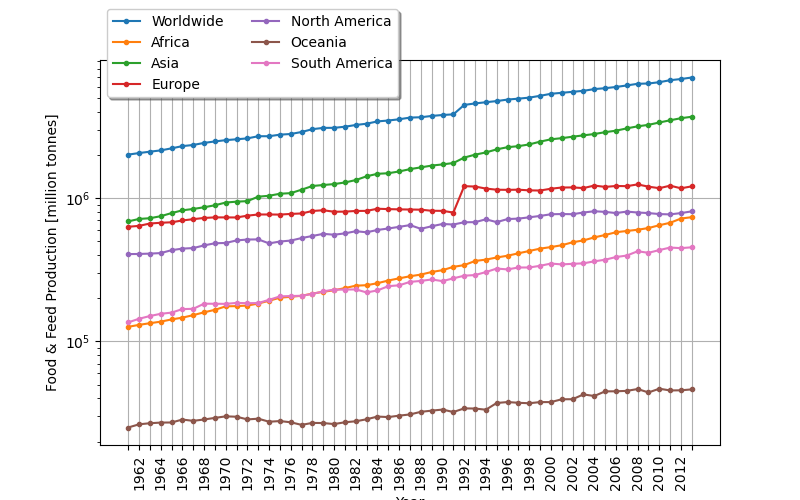

In [22]:


df_sum_world = df_FAO[df_FAO.aggregated == 1].loc[:,'1961':'2013'].sum(axis=0,numeric_only=True)
df_sum_region = df_FAO[df_FAO.aggregated == 1].groupby('region').sum(numeric_only=True).loc[:,'1961':'2013'].transpose()

%matplotlib widget
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.semilogy(df_sum_world,label='Worldwide',marker='.')
ax.semilogy(df_sum_region,label=df_sum_region.columns,marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.set_xlabel('Year')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.15), fancybox=True,ncols=2, shadow=True)
ax.set_ylabel('Food & Feed Production [million tonnes]')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

mplcursors.cursor(hover=True)

### Comentarios
- En europa hay un crecimiento a partir de 1992, cuando se instituye la CAP reform (common agricultural policy reform):
    - https://info.bml.gv.at/en/topics/agriculture/eu-agricultural-policy-and-subsidies/national-strategic-plan/the-reforms-of-the-common-agricultural-policy---an-overview.html
- África, Asia y Sudamérica en menor medida, tuvieron un crecimiento sostenido que ha influido en la tendencia mundial.

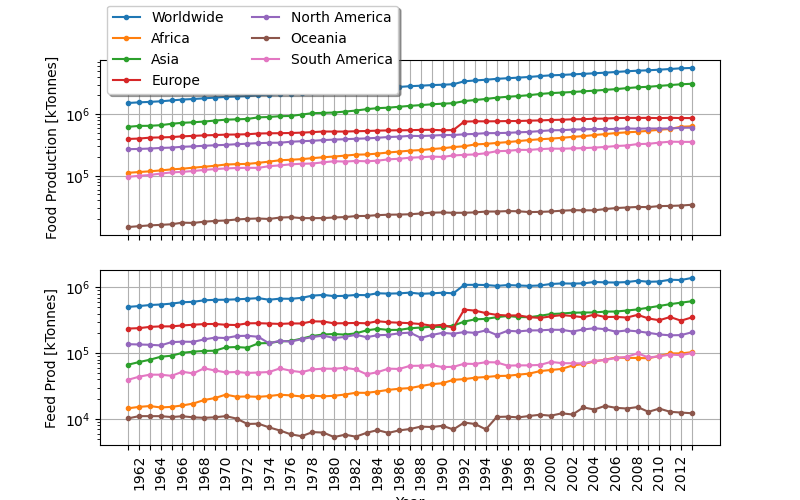

In [23]:
df_sum_world_food = df_FAO[(df_FAO.element=='Food') & (df_FAO.aggregated == 1)].loc[:,'1961':'2013'].sum(axis=0,numeric_only=True)
df_sum_region_food = df_FAO[(df_FAO.element=='Food') & (df_FAO.aggregated == 1)].groupby(['region']).sum(numeric_only=True).loc[:,'1961':'2013'].transpose()

df_sum_world_feed = df_FAO[(df_FAO.element=='Feed') & (df_FAO.aggregated == 1)].loc[:,'1961':'2013'].sum(axis=0,numeric_only=True)
df_sum_region_feed = df_FAO[(df_FAO.element=='Feed') & (df_FAO.aggregated == 1)].groupby(['region']).sum(numeric_only=True).loc[:,'1961':'2013'].transpose()

%matplotlib widget
fig,axes = plt.subplots(2,1,figsize=(8,5),sharex=True)
ax = axes[0]
ax.semilogy(df_sum_world_food,label='Worldwide',marker='.')
ax.semilogy(df_sum_region_food,label=df_sum_region_food.columns,marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.35), fancybox=True,ncols=2, shadow=True)
ax.set_ylabel('Food Production [kTonnes]')

ax = axes[1]
ax.semilogy(df_sum_world_feed,label='Worldwide',marker='.')
ax.semilogy(df_sum_region_feed,label=df_sum_region_feed.columns,marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.set_ylabel('Feed Prod [kTonnes]')


ax.set_xlabel('Year')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

mplcursors.cursor(hover=True)

### Comentarios
- Al separar Feed y Food, se observa que Oceanía tuvo una caída en la producción de alimento para ganado y aves de corral, mientras que las otras regiones no tuvieron grandes cambios.

In [24]:
df_food_country = df_FAO[df_FAO.element=='Food'].groupby('area_abbreviation').sum(numeric_only=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_food_country, left_on='iso_a3', right_on=df_food_country.index)

%matplotlib widget
def plot_world_year(year):
    plt.clf()
    fig, ax = plt.subplots(1, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    world.plot(column=str(year), ax=ax, legend=True, cax=cax)
    fig.suptitle(f'Food world map in year {year} in kTonnesones')
    plt.close()
    return fig
    
fig = interact(plot_world_year,year=(1961,2013,1),continuous_update=False)

C:\Users\fdadam\AppData\Local\Temp\ipykernel_11344\3616587813.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


interactive(children=(IntSlider(value=1987, description='year', max=2013, min=1961), Output()), _dom_classes=(…

### Comentarios
- Esta visualización permite ver el cambio en producción de comida para humanos y ganado en diferentes países del mundo.
- Es notorio como EE.UU e India han aumentado a través de los años su producción.
- A partir del cambio de escala se muestra como ha aumentado la producción mundial, donde China producia alrededor de 400.000 kTonnes en 1961 a 2.5 Millones de kTonnes
- China es consistentemente el país más productor de alimentos

# Paises que más producen Food & Feed en promedio vs Argentina

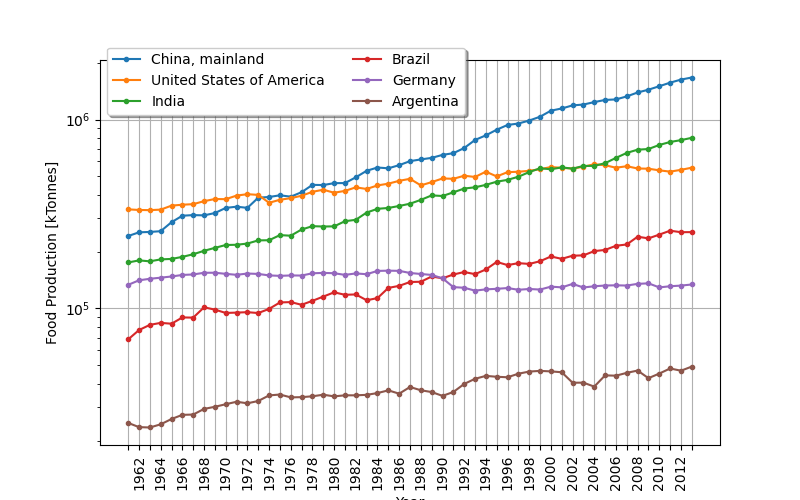

In [25]:
df_countries = df_FAO[(df_FAO.aggregated == 1)].groupby('area').sum(numeric_only=True).loc[:,'1961':'2013']
df_countries['mean_total'] = df_countries.loc[:,'1961':'2013'].mean(axis=1)
df_countries_arg = pd.Series.to_frame(df_countries.loc['Argentina']).transpose()
df_countries = df_countries.sort_values(by='mean_total',ascending=False).iloc[0:5]
df_countries = pd.concat([df_countries,df_countries_arg])
df_countries = df_countries.loc[:,'1961':'2013'].transpose()

%matplotlib widget
fig,ax = plt.subplots(1,1,figsize=(8,5),sharex=True)
ax.semilogy(df_countries,label=df_countries.columns,marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
ax.set_ylabel('Food Production [kTonnes]')
ax.set_xlabel('Year')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

### Comentarios
- Se seleccionaron los 5 países con más producción de alimentos a nivel mundial, y a Argentina
- Se observa que Argentina, comparada con los otros países tiene un crecimiento menor especialmente en los años 2001 y 2008. Además, está casi un orden de magnitud por debajo de los principales productores de alimentos.
- Hay 3 países con crecimiento sostenido: China, EE.UU y Brasil
- Alemania tuvo dos epocas de producción relativamente constante. La caida del muro de Berlín (09/11/1989) parece haber afectado negativamente la producción.


# Food que más se produce en promedio

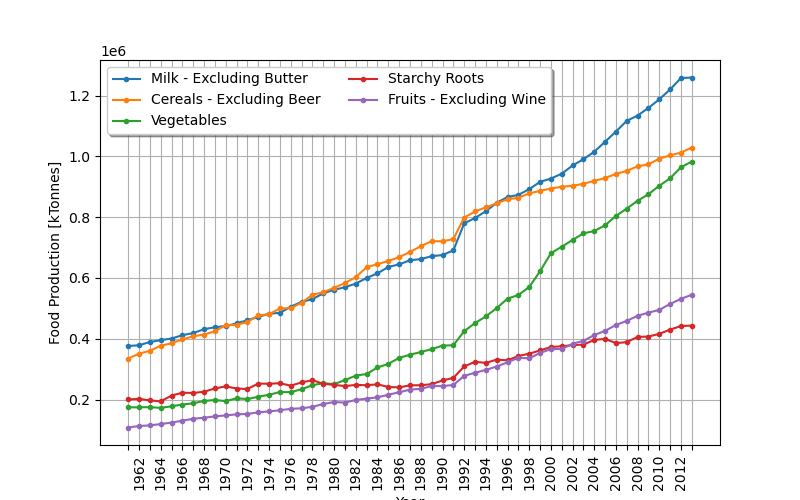

In [26]:
df_alimentos = df_FAO[(df_FAO['element']=='Food') & (df_FAO.aggregated == 1)].groupby('item').sum(numeric_only=True).loc[:,'1961':'2013']
df_alimentos['mean_total'] = df_alimentos.mean(axis=1)
df_alimentos = df_alimentos.sort_values(by='mean_total',ascending=False).iloc[0:5]

df_alimentos = df_alimentos.loc[:,'1961':'2013'].transpose()
%matplotlib widget
fig,ax = plt.subplots(1,1,figsize=(8,5),sharex=True)
ax.plot(df_alimentos,label=df_alimentos.columns,marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fancybox=True,ncols=2, shadow=True)
ax.set_ylabel('Food Production [kTonnes]')
ax.set_xlabel('Year')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

### Comentarios
- Seleccionamos los 5 alimentos con mayor producción promedio a nivel mundial y se observa un importante aumento a partir de 1990, en especial cereales y productos lacteos.


In [27]:
def plot_meat_feed(country='Argentina'):
    meats = ['Bovine Meat','Meat','Meat, Other', 'Poultry Meat','Pigmeat']
    df_meats = df_FAO[(df_FAO.element == 'Food') & 
                      (df_FAO.area == country) & 
                      (df_FAO.item.isin(meats) &
                      (df_FAO.aggregated == 1)
                      )
                     ].loc[:,'1961':'2013'].sum(numeric_only=True)

    df_feed = df_FAO[(df_FAO.element == 'Feed') & 
                     (df_FAO.area == country) &
                     (df_FAO.aggregated == 1)
                     ].loc[:,'1961':'2013'].sum(numeric_only=True)

    df_meat_feed = pd.concat({'meat_production':df_meats,
                             'feed_production':df_feed
                              },axis=1)

    corr_coef = np.corrcoef(df_meat_feed.meat_production,df_meat_feed.feed_production)

    plt.clf()
    
    %matplotlib widget
    fig, axes = plt.subplots(2,1,figsize=(8,7))
    fig.suptitle(f'Feed production vs Meat production in {country}\n' + 'Corr_coef = {:1.4f}'.format(corr_coef[0,1]))
    
    ax = axes[0]
    m, b = np.polyfit(df_meat_feed.meat_production,df_meat_feed.feed_production, 1)
    ax.scatter(df_meat_feed.meat_production,df_meat_feed.feed_production)
    ax.plot(df_meat_feed.meat_production,m*df_meat_feed.meat_production+b,'k-')
    ax.grid(True)
    ax.set_ylabel('Feed Production [kTonnes]')
    ax.set_xlabel('Meat Production [kTonnes]')

    ax = axes[1]
    ax.plot(df_meat_feed.index,df_meat_feed.meat_production,label='Meat Production',marker='.')
    ax.plot(df_meat_feed.index,df_meat_feed.feed_production,label='Feed Production',marker='.')
    plt.xticks(rotation=90)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
    ax.set_ylabel('Food Production [kTonnes]')
    ax.set_xlabel('Year')
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.close()
    return fig

fig = interact(plot_meat_feed,country=sorted(list(set(df_FAO.area))),continuous_update=False)
mplcursors.cursor(hover=True)

interactive(children=(Dropdown(description='country', index=5, options=('Afghanistan', 'Albania', 'Algeria', '…

### Comentarios
- Este gráfico permite analizar la correlación entre la producción de alimento para ganado (Feed) y la producción de carnes (i.e: carne bobina, porcina, de aves de corral y otras -e.g: conejo-). 
- En un segundo gráfico se muestra la evolución de ambas variables respecto del tiempo.
- Podemos observar que:
    - Argentina tiene una correlación relativamente baja, se infiere que la producción de alimento para ganado se destina a la exportación
    - China tiene una correlación muy alta, lo que permite inferir que toda su producción de alimento de ganado la utiliza para producción de ganado local
    - Reino Unido tiene una correlación relativamente baja, pero negativa, por lo que se infiere que a pesar de generar menos alimento para ganado año a año, produce más carne; esto sugiere que importa alimento para ganado

# Datos de Argentina

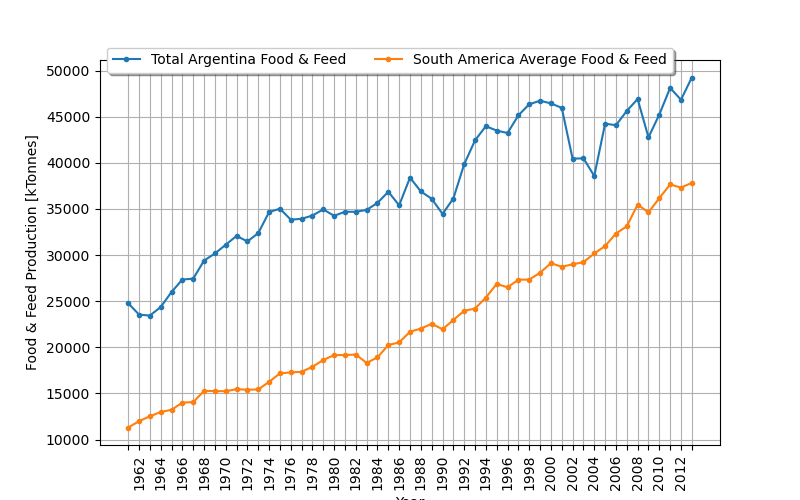

In [28]:
df_sum_arg_food = df_FAO[(df_FAO.area=='Argentina') & (df_FAO.aggregated == 1)].loc[:,'1961':'2013'].sum(axis=0,numeric_only=True)

#num_SA_excluding_arg = df_FAO[(df_FAO.area!='Argentina') & (df_FAO.region=='South America')]['area'].nunique()
#df_avg_SA_food = df_FAO[(df_FAO.area!='Argentina') & (df_FAO.region=='South America') & (df_FAO.aggregated == 1)].groupby(['region']).sum(numeric_only=True)/num_SA_excluding_arg

num_SA_excluding_arg = df_FAO[(df_FAO.region=='South America')]['area'].nunique()
df_avg_SA_food = df_FAO[(df_FAO.region=='South America') & (df_FAO.aggregated == 1)].groupby(['region']).sum(numeric_only=True)/num_SA_excluding_arg
df_avg_SA_food = df_avg_SA_food.loc[:,'1961':'2013'].transpose()

%matplotlib widget
fig,ax = plt.subplots(1,1,figsize=(8,5),sharex=True)
ax.plot(df_sum_arg_food,label='Total Argentina Food & Feed',marker='.')
ax.plot(df_avg_SA_food,label='South America Average Food & Feed',marker='.')
plt.xticks(rotation=90)
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
ax.set_ylabel('Food & Feed Production [kTonnes]')
ax.set_xlabel('Year')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

mplcursors.cursor(hover=True)

### Comentarios
- Este gráfico muestra la totalidad de la producción de comida para humanos y para ganado de Argentina con respecto a la media de Sudamérica, lo que se muestra es que la producción Argentina está por encima del promedio de la región.

In [29]:
%matplotlib widget
def plot_country_year(year='2013',country='Argentina'):
    plt.clf()
    fig, ax = plt.subplots(1, 1)
    df_country = df_FAO[(df_FAO.area==country) & (df_FAO.aggregated == 1)].groupby('item').sum(numeric_only=True).loc[:,'1961':'2013']
    df_country_year_sorted = df_country[str(year)].sort_values(ascending=True)
    
    ax.barh(df_country_year_sorted.index,
            df_country_year_sorted.values,
            log=True
          )
    fig.suptitle(f'Food & Feed in {country}. Year: {year}')
    ax.set_xlabel('Production [kTonnes]')
    ax.grid(True)
    plt.close()
    return fig
    
fig = interact(plot_country_year,year=np.arange(1961,2014),country=sorted(list(set(df_FAO.area))),continuous_update=False)

interactive(children=(Dropdown(description='year', options=(1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 19…

### Comentarios
- Este gráfico interactivo permite ver las diferentes categorías de producción de alimento para humanos y ganado de país por año
- En Argentina se ve que casi todos los años los alimentos más producidos son Lecha y Cereales, seguidos por carnes y vinos. Especias y nueces están consistentemente en los últimos puestos

In [30]:
def plot_feedfood_country(country='Argentina'):
    %matplotlib widget
    plt.clf()
    
    fig,axes = plt.subplots(3,1,figsize=(8,12),sharex=True)
    fig.suptitle(f'Feed & Food by year in {country}')
    ax = axes[0]
    df_food = df_FAO[(df_FAO.element == 'Food')  & 
                         (df_FAO.area == country) & 
                         (df_FAO.aggregated == 1)].groupby('item').sum(numeric_only=True).loc[:,'1961':'2013']
    df_food['mean_total'] = df_food.mean(axis=1)
    df_food = df_food.sort_values(by='mean_total',ascending=False).iloc[0:5]
    df_food = df_food.loc[:,'1961':'2013'].transpose()

    ax.plot(df_food,label=df_food.columns,marker='.')
    plt.xticks(rotation=90)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
    ax.set_ylabel('Food Production [kTonnes]')

    ax = axes[1]
    df_feed = df_FAO[(df_FAO.element == 'Feed') & 
                         (df_FAO.area == country) & 
                         (df_FAO.aggregated == 1)].groupby('item').sum(numeric_only=True).loc[:,'1961':'2013']
    df_feed['mean_total'] = df_feed.mean(axis=1)
    df_feed = df_feed.sort_values(by='mean_total',ascending=False).iloc[0:5]
    df_feed = df_feed.loc[:,'1961':'2013'].transpose()

    ax.plot(df_feed,label=df_feed.columns,marker='.')
    plt.xticks(rotation=90)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
    ax.set_ylabel('Feed Production [kTonnes]')

    ax = axes[2]
    df_feedfood = df_FAO[(df_FAO.area == country) &
                             (df_FAO.aggregated == 1)].groupby('item').sum(numeric_only=True).loc[:,'1961':'2013']
    df_feedfood['mean_total'] = df_feedfood.mean(axis=1)
    df_feedfood = df_feedfood.sort_values(by='mean_total',ascending=False).iloc[0:5]
    df_feedfood = df_feedfood.loc[:,'1961':'2013'].transpose()

    ax.plot(df_feedfood,label=df_feedfood.columns,marker='.')
    plt.xticks(rotation=90)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05), fancybox=True,ncols=2, shadow=True)
    ax.set_ylabel('Feed & Food Production [kTonnes]')
    ax.set_xlabel('Year')
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.close()
    return fig
fig = interact(plot_feedfood_country,country=sorted(list(set(df_FAO.area))),continuous_update=False)

interactive(children=(Dropdown(description='country', index=5, options=('Afghanistan', 'Albania', 'Algeria', '…

### Comentarios
- Estos gráficos muestran la evolución temporal de los 5 alimentos más producidos de cada pais en promedio, separados en alimentos para humanos, para ganado y combinados
- En el caso de Argentina, se puede ver que al separar la producción de alimento para humanos y para ganado, se ve que la gran mayoría de los cereales producidos son para ganado, haciendo que la leche sea el alimento para humanos más producido a través de todos los años considerados
- Al ver el gráfico combinado se puede ver que hasta fines de los '70 la cantidad de leche y cereales producidas era relativamente similar
- Se puede notar en la baja de producción de cereales cuatro hitos económicos:
    - La hiperinflación de la vuelta a la democracia
    - La crisis económica de principios de los '90, seguida de un repunte durante el gobierno de C. Menem
    - La recuperación económica del 2004
    - La crisis económica por la burbuja inmobiliaria de los EE.UU en 2008

# Población

In [31]:
df_pop = pd.read_csv('./datasets/world_population.csv')
df_pop.columns = df_pop.columns.str.lower()
df_pop.columns = df_pop.columns.str.replace(' ','_')
df_pop = df_pop.rename(columns={'country/territory':'area'})

df_pop = df_pop[['cca3','area','2010_population', '2000_population', '1990_population', '1980_population', '1970_population']]
df_pop.set_index('cca3',inplace=True)

df_world = df_FAO[(df_FAO.element=='Food') & (df_FAO.aggregated == 1)].groupby('area_abbreviation').sum(numeric_only=True).loc[:,'1961':'2013']
df_world = df_world[['2010', '2000', '1990', '1980', '1970']]

df_merged = df_world.merge(df_pop,left_index=True, right_index=True)

In [32]:
%matplotlib widget
def plot_pop_and_food(year='1970'):
    
    plt.clf()

    fig,ax = plt.subplots(1,1)
    ax.scatter(df_merged[year],df_merged[f'{year}_population'])

    fig.suptitle(f'Food Production and population relation in {year}')
    ax.grid(True)
    for i, txt in enumerate(list(df_merged.index)):
        ax.annotate(txt, (df_merged[year][i], df_merged[f'{year}_population'][i]))
    
    ax.plot(np.linspace(0,10**6),(1000)*np.linspace(0,10**6),'r--',label='Ref: 1T/hab')
    ax.legend(loc='upper left')
    ax.set_xlabel('Food production [kTonnes]')
    ax.set_ylabel('Population')
    ax.set_yscale('log')
    ax.set_xscale('log')

    plt.close()
    return fig
fig = interact(plot_pop_and_food,
               year=['2010', '2000', '1990', '1980', '1970'],
               continuous_update=False)

interactive(children=(Dropdown(description='year', index=4, options=('2010', '2000', '1990', '1980', '1970'), …

### Comentarios

- Se puede ver a través del tiempo paises que no siguen la tendencia esperada, es decir, más producción a partir de más población.
    - Qatar (QAT) en 2010: Tiene mucha producción con respecto a la población que tienen
    - Congo (COD) tiene poca producción respecto a la población que tiene
    - Resaltan los países que más producen y que más población tienen (EE.UU, India y China)
    - Observar el caso de Azerbaijan (AZE) entre 1970 y 2010

Text(0.5, 0.98, 'Pop & Food worldwide')

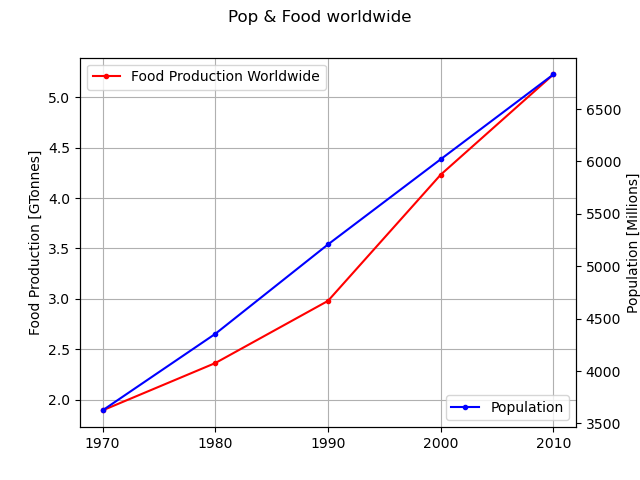

In [33]:
years = ['1970','1980', '1990', '2000' ,'2010']
years_pop = ['1970_population', '1980_population', '1990_population','2000_population','2010_population',]

fig,ax = plt.subplots(1,1)
ax.plot(years,df_merged[years].sum()/1e6,'r.-',label='Food Production Worldwide')
ax.set_ylabel('Food Production [GTonnes]')
ax2 = ax.twinx()
ax2.plot(years,df_merged[years_pop].sum()/1e6,'b.-',label='Population')
ax2.set_ylabel('Population [Millions]')
ax.legend(loc='upper left')
ax2.legend(loc='lower right')
ax.grid(True)
fig.suptitle(f'Pop & Food worldwide')

### Comentarios
- En este gráfico se muestra la evolución de la producción de alimentos para humanos y población.
- Se puede decir que la población (en millones) y la producción de alimentos (En millones de miles de toneladas) han tenido crecimientos similares.

In [34]:
years = ['1970','1980', '1990', '2000' ,'2010']
years_pop = ['1970_population', '1980_population', '1990_population','2000_population','2010_population',]

def plot_pop_food_country(country_name='Argentina'):
    country = df_merged[df_merged.area==country_name].index[0]
    %matplotlib widget
    plt.clf()
    fig,ax = plt.subplots(1,1)
    ax.plot(years,df_merged[years].loc[country],'r.-',label='Food Production')
    ax.set_ylabel('Food Production [kTonnes]')
    ax2 = ax.twinx()
    ax2.plot(years,df_merged[years_pop].loc[country]/1e6,'b.-',label='Population')
    ax2.set_ylabel('Population [Millions]')
    ax.legend(loc='upper left')
    ax2.legend(loc='lower right')
    ax.grid(True)
    fig.suptitle(f'Pop & Food in {country_name}')
    plt.close()
    return fig

fig = interact(plot_pop_food_country,
               country_name=sorted(set(list(df_merged.area))),
               continuous_update=False)

interactive(children=(Dropdown(description='country_name', index=5, options=('Afghanistan', 'Albania', 'Algeri…

### Comentarios
- En este gráfico se muestra la evolución de la producción de alimentos para humanos y población de cada país
- En Argentina se ve una tendencia similar a la mundial, a partir de los '90 comenzó a existir un superavit de producción de alimentos, la población ha crecido linealmente.
- En Qatar hubo siempre un 'superavit' de alimentos respecto de la población*
- En China hubo siempre un 'deficit' de alimentos respecto a la población*
- En Hungria ambos tienen tendencia negativa en las ultimas dos décadas
- Georgia y Dominica ha decaido en población pero aumentado en producción de alimentos

\*En el próximo gráfico se explora el concepto de superavit y deficit

In [35]:
years = ['1970','1980', '1990', '2000' ,'2010']
years_pop = ['1970_population', '1980_population', '1990_population','2000_population','2010_population',]

def plot_pop_food_country(country_name='Argentina'):
    %matplotlib widget
    
    country = df_merged[df_merged.area==country_name].index[0]
    plt.clf()
    fig,ax = plt.subplots(1,1)
    rel = np.array(df_merged[years].loc[country])/np.array(df_merged[years_pop].loc[country]/1e6)
    rel_teorica = 675
    ax.plot(years,rel,marker='.')
    ax.axhline(rel_teorica,color='black',linestyle='--',label='675 kg por persona por año')
    ax.set_ylabel('Food Production [kTonnes]/Population [Millions]')
    ax.legend(loc='best')
    ax.grid(True)
    fig.suptitle(f'Food/Person index in {country_name}')
    plt.close()
    return fig

fig = interact(plot_pop_food_country,
               country_name=sorted(set(list(df_merged.area))),
               continuous_update=False)

interactive(children=(Dropdown(description='country_name', index=5, options=('Afghanistan', 'Albania', 'Algeri…

### Comentarios

- De acuerdo a https://goodseedventures.com/worldwide-food-consumption-per-capita-2/ el consumo promedio de alimentos y bebidas es de 675kg por persona por año, es decir 675 [Miles de Toneladas] por [Millon de Personas]
    - Argentina siempre tuvo superavit de producción
    - Brasil siempre tuvo superavit 
    - China desde los '90 tuvo superavit de producción
    - Mozambique siempre tuvo deficit de producción
    - Granada tuvo superavit en los 90 únicamente

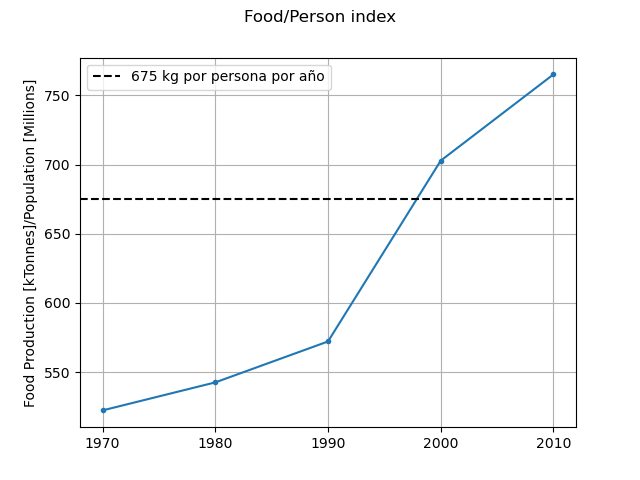

In [36]:
fig,ax = plt.subplots(1,1)
rel = np.array(df_merged[years].sum())/np.array(df_merged[years_pop].sum()/1e6)
rel_teorica = 675
ax.plot(years,rel,marker='.')
ax.axhline(rel_teorica,color='black',linestyle='--',label='675 kg por persona por año')
ax.set_ylabel('Food Production [kTonnes]/Population [Millions]')
fig.suptitle('Food/Person index')
ax.legend(loc='best')
ax.grid(True)

### Comentarios
- Se puede ver que hasta principios de los 2000, mundialmente no se producía suficiente comida mundialmente